# Passenger Screening Algorithm Challenge
Camilo Ruiz, Ana-Maria Istrate.  
18 November 2017  
  
**Table of Contents:**
1. Introduction
2. Proposed Work
3. Current Work

# 1. Introduction

## 1.1 Motivation

Every day, two million passengers board domestic flights in the United States. Before boarding a flight, each passenger must be scanned by a millimeter wave scanner (MWS). These scanners today must maximize both safety and efficiency. The inability to detect threats could jeopardize national security. Conversely, overly sensitive scanners can cause a high number of false positives. Passengers with suspected threats must undergo secondary screening. A high false positive rate, therefore, can incur massive airport delays especially when compounded over the 2M MWS scans conducted each day. The goal of this project is to design a Deep Learning architecture that (1) maximizes the detection rate of real threats in MWS scans while simultaneously (2) minimizing the false positive rate. 


## 1.2 Problem Statement and Data Set

To maximize the efficiency of secondary screening, a successful algorithm must take in an MWS scan and output the probability that a threat is present in each of 17 body zones (image below). 

To solve this problem, we are utilizing an open dataset provided by the US Department of Homeland Security on Kaggle. The dataset is released in two stages. The first stage shares all of the images for training. The second stage will include a separate set of images for testing that participants cannot access. Only the first stage has been released and thus all description below is for the Stage I Dataset.


### 1.2.1 Body Zones
** Table of Body Zones **
![Table of Body Zones](https://kaggle2.blob.core.windows.net/competitions/kaggle/6775/media/body_zone_descriptions.png)

** Image of Body Zones **
![Image of Body Zones](https://storage.googleapis.com/kaggle-competitions-data/kaggle/6775/body_zones.png?GoogleAccessId=competitions-data@kaggle-161607.iam.gserviceaccount.com&Expires=1511222797&Signature=f1LeCZ8l3X5wccXtAijRmKwMv6enYgWh7AlB%2BfTe2ruw%2Bf%2F98DQGJ9dA4Q7ppBdnLUCoyPuNXJVfajrFP8UcYYNx3vxZTJFE1MWG5B2tNXh4oeNXuCvYzJnyeNbaewvyi5Ozjk5gIBagzQII4mcqWb3wEEZbW%2FSN3ENhGH6oxCViBi%2FvuyENfQOxkWMb3oyi7dDgDJv4F8VC3F0CyANgCRH06anfXy8Y%2B77foDuPS2y1Xu%2BleSQKKK%2FHggJbUyIvWATZnq3x5mKtSIm3oBd1QsZXd%2FCBzptVsVAVWh43WmzzutOUb%2FqqR8fFPatEKb4nTny430BFwwOg6ZLBdHL03Q%3D%3D)

### 1.2.2 Stage I Dataset 

#### 1.2.2.1 Overview
The dataset contains MWS scans for 1,147 individuals. Each scan contains 17 labels, corresponding to whether or not a threat is present in each of 17 body zones. The dataset is balanced at the individual level: 219 individuals have no threats present in any of their body zones; 303, 307, and 318 individuals have 1, 2, and 3 threats present in any of their body zones respectively. However, the dataset is not balanced at the zone level: 1,871 zones have a threat present in them (9.6% of images) while 17,628 images do not have a threat present in them (90.4% of images). The code used to extract this information from the dataset is shown below. 

#### 1.2.2.2 Distribution
The Stage I Dataset was constructed by simulating real scanning conditions. Each scan contains variety in: gender, body mass index, number of threats, type of threats, and clothing type (light clothes to heavy clothes). This data was compiled to closely match the distribution of the Stage II Dataset, even though different individuals are in the Stage II dataset. 

#### 1.2.2.3 Image Formats
Each scan can be viewed in one of four formats, each explained below. All formats are simply different representations of the same 3D scan. 
0. ** Commonalities across formats **  All formats contain a 512 byte header file followed by the file’s data. The data is stored sequentially in order from the axis with the largest stride to the axis with the smallest stride. An AYX order would mean that the angular axis was the largest stride and consists of a series of YX planes incremented by angle.   
1. ** Projected Image Angle Sequence files ** (.aps; 10.3MB per file; AYX - angle, vertical axis, horizontal axis) represent a 3D image composed of a series of YX plans incremented by angle.   
2. ** Combined Image 3D files ** (.a3d; 330MB per file; YZX - height, depth axis, horizontal axis) consist of eight 3D images equally spaced around the scanned region compiled into one composite 3D image. The 3D image is stored in sequential height slices.  
3. ** Combined Image Angle Sequence File ** (.a3daps; 41.2MB per file; AYX - angle, vertical axis, horizontal axis) are generated from .a3d files. The resulting file is similar to .aps files, representing a 3D image sliced by angular slices.  
4. ** Calibrated Object Raw Data File ** (.ahi; 2.26GB per file; FXY - frequency, horizontal angular, vertical) files are raw data files. The remaining formats have been processed signals engineers to create images. Raw data points represent complex floating point words in frequency planes.   





## 1.3 Loss 

Consistent with the competition's metric, we will evaluate or model on the basis of log loss. For $N$ images, we will make $17N$ predictions. Subsequently, we will calculate the loss:
$$ Loss = \frac{-1}{N} \sum_{i = 1}^N [y_i log(\hat{y}_i) + (1-y_i) log(1-\hat{y}_i)] $$ where
- $N$ is 17*the number of scans in our data
- $y_i$ is the label for a zone, $1$ if a threat is present and $0$ otherwise
- $\hat{y}_i$ is the predicted label for a zone, $1$ if a threat is present and $0$ otherwise

# 2. Proposed Work

## 2.1 Architectures and Transfer Learning
Given that each file type is encoded as a sequence of 2D images (i.e. not a voxel or point cloud representation), we will start by transfer learning from well-established 2D image classification algorithms. For each of the algorithms below, we will load pretrained models and retrain the last layers, modifying them so that the last layer is a fully connected sigmoid layer with 17 nodes (one for each body zone). By utilizing this architecture, we will take advantage of multitask learning -- i.e. learned features that effectively detect threats in one region will also likely effectively detect threats in another region. 

1. ** AlexNet **
![AlexNet](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/08/08131757/temp6.png)
2. ** VGG Net **
![VGGNet](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/08/08131808/temp7.png)
3. ** GoogleNet **
![GoogleNet](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/08/08131838/temp9.png)
4. ** ResNet **
![ResNet](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/08/08131926/temp12.png)

To date, we have implemented AlexNet (results below) on a subset of our examples. Our immediate next step is to implement AlexNet on our full set of examples and evaluate the results before moving further toward other architectures. We have downloaded the full data set. 

## 2.2 Data Augmentation Techniques
Given the relatively small size of our data set, we intend to augment our data via:
1. Mirroring each 2D image horizontally: human body symmetry suggests that effective detection of a threat in the right arm would also lead to effective detection of a threat in the left arm. This alone will increase the size of our data by 2X. 
2. Local warping: we plan on adding noise to the images to similarly enhance the size of the data set.

## 2.3 Final refinement
To finally boost our accuracy further, we hope to:
1. Ensemble our outputs: by training several networks independently and averaging the output y, we will hopefully have a higher accuracy. 

## 2.4 Additional Challenges
We are concerned about the runtime memory requirements required for training given the size of our datasets. At present, we are working primarily with .aps files (10.3MB per file; ~10GB for full data set) as they provide the easiest format to work with given the size. We may have to load and clear specific batches from memory to ensure that we don't exceed runtime memory limits for our machines.

# 3. Data Set Exploration Code

**Imports**

In [1]:
# import libraries
from __future__ import print_function
from __future__ import division

import numpy as np 
import pandas as pd
import os
import re

import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.layers.normalization import local_response_normalization

import random
from timeit import default_timer as timer
# imports
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import tsahelper as tsa

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


## 3.1 Explanation of Labels

In [2]:
# Basic processing of the labels file
labels_df = pd.read_csv("/Users/camiloruiz/Documents/Stanford University/FA17/CS230/homeland-security-threat-detection/sample/stage1_labels.csv")
labels_df["Sample"] = labels_df["Id"].apply(lambda x: x.split("_")[0])
unique_samples = pd.unique(labels_df["Sample"])
[nrow, ncol] = labels_df.shape

The **total number of individuals** in our dataset is:

In [3]:
print(unique_samples.size)

1147


Each of these individuals produces a set of images with 17 zones, each of which have a unique label. Therefore, the **total number of images** in our dataset is:

In [4]:
print(nrow)

19499


The data is imbalanced, with far more "safe" labels (0) than "threat" labels (1). 

We can break this down at the "zone" level:

In [5]:
labels_df["Probability"].value_counts(dropna=False)

0    17628
1     1871
Name: Probability, dtype: int64

We can also break this down at the individual level:

In [6]:
threats_by_sample = pd.DataFrame(index=unique_samples)
threats_by_sample["num_threats"] = np.nan

for sample in unique_samples:
    labels_for_sample = labels_df[labels_df["Sample"] == sample]
    num_threats_for_sample = np.sum(labels_for_sample["Probability"])
    if np.isnan(num_threats_for_sample):
        num_threats_for_sample = 0
    
    threats_by_sample.at[sample, "num_threats"] = num_threats_for_sample


In [7]:
threats_by_sample["num_threats"].value_counts(dropna=False)

3.0    318
2.0    307
1.0    303
0.0    219
Name: num_threats, dtype: int64

Therefore, even though the number of zones that have threats is relatively sparse; most individuals have at leastone threat.

## 3.2 Example of Positive and Negative Labels

** Constants **

In [8]:
#----------------------------------------------------------------------------------
# read_header(infile):  takes an aps file and creates a dict of the data
#
# infile:               an aps file
#
# returns:              all of the fields in the header
#----------------------------------------------------------------------------------
#import tsahelper as tsa
#---------------------------------------------------------------------------------------
# Constants
#
# INPUT_FOLDER:                 The folder that contains the source data
#
# PREPROCESSED_DATA_FOLDER:     The folder that contains preprocessed .npy files 
# 
# STAGE1_LABELS:                The CSV file containing the labels by subject
#
# THREAT_ZONE:                  Threat Zone to train on (actual number not 0 based)
#
# BATCH_SIZE:                   Number of Subjects per batch
#
# EXAMPLES_PER_SUBJECT          Number of examples generated per subject
#
# FILE_LIST:                    A list of the preprocessed .npy files to batch
# 
# TRAIN_TEST_SPLIT_RATIO:       Ratio to split the FILE_LIST between train and test
#
# TRAIN_SET_FILE_LIST:          The list of .npy files to be used for training
#
# TEST_SET_FILE_LIST:           The list of .npy files to be used for testing
#
# IMAGE_DIM:                    The height and width of the images in pixels
#
# LEARNING_RATE                 Learning rate for the neural network
#
# N_TRAIN_STEPS                 The number of train steps (epochs) to run
#
# TRAIN_PATH                    Place to store the tensorboard logs
#
# MODEL_PATH                    Path where model files are stored
#
# MODEL_NAME                    Name of the model files
#
#----------------------------------------------------------------------------------------
INPUT_FOLDER = '/Users/camiloruiz/Documents/Stanford University/FA17/CS230/homeland-security-threat-detection/sample'
PREPROCESSED_DATA_FOLDER = 'tsa_datasets/preprocessed/'
STAGE1_LABELS = 'tsa_datasets/stage1_labels.csv'
THREAT_ZONE = 1
BATCH_SIZE = 16
EXAMPLES_PER_SUBJECT = 182

FILE_LIST = []
TRAIN_TEST_SPLIT_RATIO = 0.2
TRAIN_SET_FILE_LIST = []
TEST_SET_FILE_LIST = []

IMAGE_DIM = 250
LEARNING_RATE = 1e-3
N_TRAIN_STEPS = 1
TRAIN_PATH = 'tsa_logs/train/'
MODEL_PATH = 'tsa_logs/model/'
MODEL_NAME = ('tsa-{}-lr-{}-{}-{}-tz-{}'.format('alexnet-v0.1', LEARNING_RATE, IMAGE_DIM, IMAGE_DIM, THREAT_ZONE )) 
# constants
COLORMAP = 'pink'
APS_FILE_NAME = '/Users/camiloruiz/Documents/Stanford University/FA17/CS230/homeland-security-threat-detection/sample/00360f79fd6e02781457eda48f85da90.aps'
BODY_ZONES = 'tsa_datasets/stage1/body_zones.png'
THREAT_LABELS = 'tsa_datasets/stage1/stage1_labels.csv'

In [9]:
cwd = os.getcwd()
print(cwd)

print(os.listdir("../sample"))

/Users/camiloruiz/Documents/Stanford University/FA17/CS230/homeland-security-threat-detection/cs230-project
['00360f79fd6e02781457eda48f85da90.a3d', '00360f79fd6e02781457eda48f85da90.a3daps', '00360f79fd6e02781457eda48f85da90.ahi', '00360f79fd6e02781457eda48f85da90.aps', '00360f79fd6e02781457eda48f85da90.aps.png', '0043db5e8c819bffc15261b1f1ac5e42.a3d', '0043db5e8c819bffc15261b1f1ac5e42.a3daps', '0043db5e8c819bffc15261b1f1ac5e42.ahi', '0043db5e8c819bffc15261b1f1ac5e42.aps', 'stage1_labels.csv']


** read_header **

In [10]:
def read_header(infile):
    # declare dictionary
    h = dict()
    
    with open(infile, 'r+b') as fid:

        h['filename'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 20))
        h['parent_filename'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 20))
        h['comments1'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 80))
        h['comments2'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 80))
        h['energy_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['config_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['file_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['trans_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['scan_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['data_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['date_modified'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 16))
        h['frequency'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['mat_velocity'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['num_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
        h['num_polarization_channels'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['spare00'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['adc_min_voltage'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['adc_max_voltage'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['band_width'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['spare01'] = np.fromfile(fid, dtype = np.int16, count = 5)
        h['polarization_type'] = np.fromfile(fid, dtype = np.int16, count = 4)
        h['record_header_size'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['word_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['word_precision'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['min_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['max_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['avg_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['data_scale_factor'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['data_units'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['surf_removal'] = np.fromfile(fid, dtype = np.uint16, count = 1)
        h['edge_weighting'] = np.fromfile(fid, dtype = np.uint16, count = 1)
        h['x_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
        h['y_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
        h['z_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
        h['t_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
        h['spare02'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['x_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['scan_orientation'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['scan_direction'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['data_storage_order'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['scanner_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['x_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['t_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['num_x_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
        h['num_y_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
        h['num_z_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
        h['num_t_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
        h['x_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['x_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['x_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['x_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['date_processed'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 8))
        h['time_processed'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 8))
        h['depth_recon'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['x_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['elevation_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['roll_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['azimuth_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['adc_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['spare06'] = np.fromfile(fid, dtype = np.int16, count = 1)
        h['scanner_radius'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['x_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['y_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['z_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['t_delay'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['range_gate_start'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['range_gate_end'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['ahis_software_version'] = np.fromfile(fid, dtype = np.float32, count = 1)
        h['spare_end'] = np.fromfile(fid, dtype = np.float32, count = 10)

    return h

#unit test ----------------------------------
#header = read_header(APS_FILE_NAME)

#for data_item in sorted(header):
#    print ('{} -> {}'.format(data_item, header[data_item]))

#----------------------------------------------------------------------------------
# read_data(infile):  reads and rescales any of the four image types
#
# infile:             an .aps, .aps3d, .a3d, or ahi file
#
# returns:            the stack of images
#
# note:               word_type == 7 is an np.float32, word_type == 4 is np.uint16      
#----------------------------------------------------------------------------------

** read_data **

In [11]:
def read_data(infile):
    # read in header and get dimensions
    h = read_header(infile)
    nx = int(h['num_x_pts'])
    ny = int(h['num_y_pts'])
    nt = int(h['num_t_pts'])
    
    extension = os.path.splitext(infile)[1]
    
    with open(infile, 'rb') as fid:
          
        # skip the header
        fid.seek(512) 

        # handle .aps and .a3aps files
        if extension == '.aps' or extension == '.a3daps':
        
            if(h['word_type']==7):
                data = np.fromfile(fid, dtype = np.float32, count = nx * ny * nt)

            elif(h['word_type']==4): 
                data = np.fromfile(fid, dtype = np.uint16, count = nx * ny * nt)

            # scale and reshape the data
            data = data * h['data_scale_factor'] 
            data = data.reshape(nx, ny, nt, order='F').copy()

        # handle .a3d files
        elif extension == '.a3d':
              
            if(h['word_type']==7):
                data = np.fromfile(fid, dtype = np.float32, count = nx * ny * nt)
                
            elif(h['word_type']==4):
                data = np.fromfile(fid, dtype = np.uint16, count = nx * ny * nt)

            # scale and reshape the data
            data = data * h['data_scale_factor']
            data = data.reshape(nx, nt, ny, order='F').copy() 
            
        # handle .ahi files
        elif extension == '.ahi':
            data = np.fromfile(fid, dtype = np.float32, count = 2* nx * ny * nt)
            data = data.reshape(2, ny, nx, nt, order='F').copy()
            real = data[0,:,:,:].copy()
            imag = data[1,:,:,:].copy()

        if extension != '.ahi':
            return data
        else:
            return real, imag

#unit test ----------------------------------
#d = read_data(APS_FILE_NAME)


** plot_image_set **

In [32]:
#----------------------------------------------------------------------------------
# plot_image_set(infile):  takes an aps file and shows all 16 90 degree shots
#
# infile:                  an aps file
#----------------------------------------------------------------------------------
def plot_image_set(infile):

    # read in the aps file, it comes in as shape(512, 620, 16)
    img = read_data(infile)
    
    # transpose so that the slice is the first dimension shape(16, 620, 512)
    img = img.transpose()
        
    # show the graphs
    fig, axarr = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
    
    i = 0
    for row in range(4):
        for col in range(4):
#             resized_img = cv2.resize(img[i], (0,0), fx=0.1, fy=0.1)
#             axarr[row, col].imshow(np.flipud(resized_img), cmap=COLORMAP)
            axarr[row, col].imshow(np.flipud(img[i]), cmap=COLORMAP)
            i += 1
    plt.show()
    fig.savefig(infile + ".png")
    print('Done!')

# unit test ----------------------------------
# plot_image_set(APS_FILE_NAME)

# unit test ----------------------------------
#plot_image_set(APS_FILE_NAME)
# plot_image_set("00360f79fd6e02781457eda48f85da90.aps")
#plot_image_set("00360f79fd6e02781457eda48f85da90.ahi")

To visualize the data, we first show an individual without any threats. To find this individual we manually inspected the labels_df dataframe and picked an example of an individual with a 0 label in every zone.

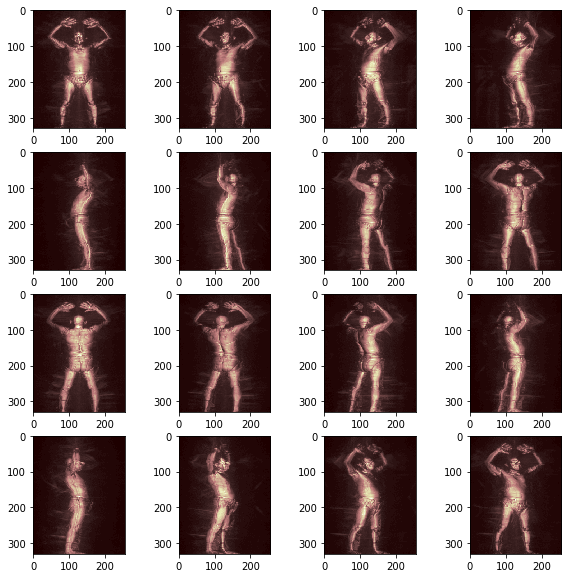

Done!


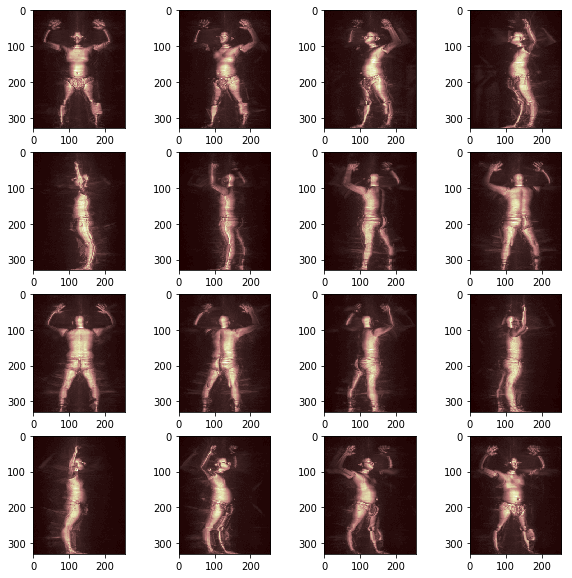

Done!


In [27]:
negative_label_example = APS_FILE_NAME
plot_image_set(negative_label_example)

Second, we show an individual with a threat near the shin (zone 14) again cherry picked to show the difference. A clear protrusion is present within the image. For the next phase of this project, we will update our read images function to show higher definition images to more clearly delineate threats via visual inspection.

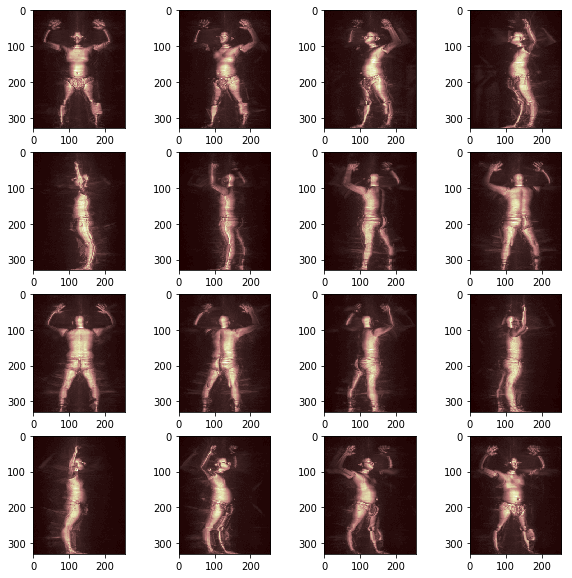

Done!


In [28]:
positive_label_example = '/Users/camiloruiz/Documents/Stanford University/FA17/CS230/homeland-security-threat-detection/sample/0043db5e8c819bffc15261b1f1ac5e42.aps'
plot_image_set(positive_label_example)

The code above is open source starter code provided by Brian Farrar at https://www.kaggle.com/jbfarrar/exploratory-data-analysis-and-example-generation to ease working with the dataset.

# 4. Completed Work

Please refer to next Jupyter Notebook.